In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../')
from Reader import *
from Data_Treatement import *

In [2]:
kdiff001 = CustomHDF5Reader('../Res/kdiff/kdiff_001.hdf')
kdiff001.open()

In [3]:
arg_kdiff001 = kdiff001.get_header_attributes()

In [4]:
kdiff001.list_measurements(kdiff001.list_groups()[0])

['Check_Time',
 'Coarse_Time',
 'ISF',
 'MSD',
 'MSD_tot',
 'NRG',
 'PCF',
 'PCF_L',
 'cluster',
 'moves_1']

# Energy

In [8]:
data_kdiff001 = Data_Treatement('../Res/kdiff/kdiff_001.hdf','NRG')
data_kdiff001.rescale_energy()
data_kdiff001.average(num_bins=50,log_scale=True)

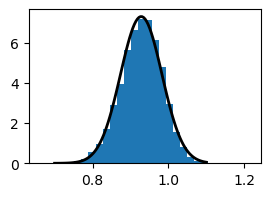

In [48]:
from scipy.stats import norm
plt.figure(figsize=(3,2))
count,bin,ignore = plt.hist(np.concatenate(data_kdiff001.distribution),bins=30,density=True)
mu, sigma = norm.fit(np.concatenate(data_kdiff001.distribution))
x = np.linspace(0.7,1.1, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

(0.9, 1.1)

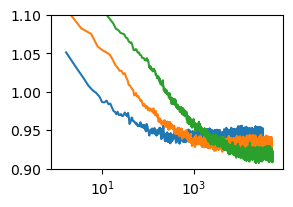

In [40]:
plt.figure(figsize=(3,2))
# import data with 300 processes previous measurement
ST1 = np.load('../Res/kdiff/kdiff_LsV.npy')
ST2 = np.load('../Res/kdiff/kiff_Ls10V.npy')
ST3 = np.load('../Res/kdiff/kiff_Ls100V.npy')
import matplotlib as mpl
import matplotlib.pyplot as plt

# For removing minor ticks when x axis is in log scale
from matplotlib.ticker import NullLocator
ax = plt.gca()
ax.xaxis.set_minor_locator(NullLocator())
N = data_kdiff001.attributes['Nlinker']
L = data_kdiff001.attributes['ell_tot']
E = data_kdiff001.attributes['Energy']
plt.plot(ST1[2:,0],(ST1[2:,1]-Fmin(N,L,E))/(Fmax(N,L,E)-Fmin(N,L,E)))
plt.plot(ST2[:,0],(ST2[:,1]-  Fmin(N,L,E))/(Fmax(N,L,E)-Fmin(N,L,E)))
plt.plot(ST3[:,0],(ST3[:,1]-  Fmin(N,L,E))/(Fmax(N,L,E)-Fmin(N,L,E)))
plt.xscale('log')
#plt.yscale('log')
plt.ylim(0.9,1.1)

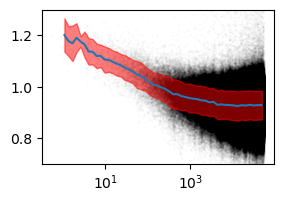

In [9]:
plt.figure(figsize=(3,2))
for i in range(data_kdiff001.Nsample):
    plt.scatter(data_kdiff001.time[i],data_kdiff001.data[i],color='black',alpha=0.01,s=1.)
plt.plot(data_kdiff001.binned_time,data_kdiff001.average_data)
plt.fill_between(data_kdiff001.binned_time,data_kdiff001.average_data-data_kdiff001.variance,data_kdiff001.average_data+data_kdiff001.variance,color='red',alpha=0.5)
plt.ylim(0.7,1.3)
plt.xscale('log')

# clusters

In [10]:
data_kdiff001 = Data_Treatement('../Res/kdiff/kdiff_001.hdf','cluster')
#data_kdiff001.rescale_energy()
data_kdiff001.average(num_bins=80,log_scale=True)

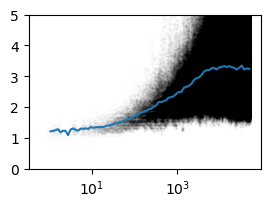

In [11]:
plt.figure(figsize=(3,2))
for i in range(data_kdiff001.Nsample):
    plt.scatter(data_kdiff001.time[i],data_kdiff001.data[i][:,0],color='black',alpha=0.01,s=1.)
plt.plot(data_kdiff001.binned_time,data_kdiff001.average_data[:,0])
#plt.fill_between(data_kdiff001.binned_time,data_kdiff001.average_data-data_kdiff001.variance,data_kdiff001.average_data+data_kdiff001.variance,color='red',alpha=0.5)
plt.ylim(0.,5)
plt.xscale('log')

# MSD

In [22]:
data_kdiff001 = Data_Treatement('../Res/kdiff/kdiff_001.hdf','MSD')
#data_kdiff001.rescale_energy()
data_kdiff001.average(num_bins=80)

ValueError: could not broadcast input array from shape (100,) into shape (80,)

In [18]:
data_kdiff001.average_data

array([1.68014567e+00, 1.44618113e+00, 1.45650880e+00, 1.28388640e+00,
       1.36802802e+00, 1.12175748e+00, 9.19082475e-01, 1.54620973e+00,
       2.14096410e+00, 1.87214690e+00, 1.84581655e+00, 1.69741203e+00,
       2.20285737e+00, 2.33300251e+00, 1.99603444e+00, 2.54427508e+00,
       2.46122560e+00, 2.75328317e+00, 2.82888217e+00, 3.03576820e+00,
       3.31268501e+00, 3.58565490e+00, 3.93481435e+00, 4.18540324e+00,
       4.33228083e+00, 4.79891059e+00, 5.10561728e+00, 5.57591022e+00,
       6.01075584e+00, 6.55640760e+00, 7.11503871e+00, 7.79388796e+00,
       8.51395321e+00, 9.37609705e+00, 1.01850117e+01, 1.10968418e+01,
       1.19079747e+01, 1.28278717e+01, 1.40922737e+01, 1.56157413e+01,
       1.71530578e+01, 1.88134238e+01, 2.05299645e+01, 2.24354755e+01,
       2.45662238e+01, 2.68408824e+01, 2.90676020e+01, 3.15635139e+01,
       3.48471831e+01, 3.83586617e+01, 4.30846492e+01, 4.76429396e+01,
       5.18696780e+01, 5.70548211e+01, 6.24718100e+01, 6.92225872e+01,
      

(0.0, 100.0)

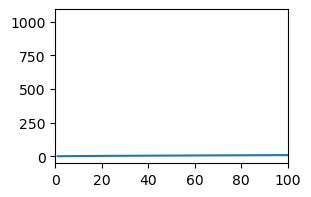

In [21]:
plt.figure(figsize=(3,2))
plt.plot(data_kdiff001.binned_time,data_kdiff001.average_data)
plt.xlim(0,100)